# VapoRock
* A thermodynamic model for vaporized silicate rocks & melts relevant to magma ocean atmospheres and stellar nebula

In [2]:
import vaporock

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler
from thermoengine import model

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See http

In [3]:
import IPython
print(IPython.__version__)
print(pd.__version__)

8.10.0
1.5.3


Define the compostion of the melt in terms of oxides

In [4]:
# melt_comp_wts = {'MgO':36.9, 'CaO':3.3, 'Al2O3':4.6, 'SiO2':50.7, 
#                  'Na2O':3e-7, 'K2O':3e-10, 'FeO':3.5}

# BSE composition from Schaefer & Fegley (TiO2 neglected)
melt_comp_wts = {'SiO2':45.97, 'MgO':36.66, 'Al2O3':4.77, 'FeO':8.24, 
                 'CaO':3.78, 'Na2O':0.35, 'K2O':0.04}


Now, calculate the corresponding melt compostion is calculated using MELTS from thermoengine after the mantle has been melted

In [5]:
system = vaporock.System(vapor_database='JANAF0')
# system = vaporock.System(vapor_database='LAMOR')
system.set_melt_comp(melt_comp_wts)
system.print_melt_comp()

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See http

MELTS liquid components:


/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


[('SiO2', 0.17905092548091792),
 ('TiO2', 0.0),
 ('Al2O3', 0.046357815686249346),
 ('Fe2O3', 0.0),
 ('MgCr2O4', 0.0),
 ('Fe2SiO4', 0.057344557277748086),
 ('MnSi0.5O2', 0.0),
 ('Mg2SiO4', 0.4547890552892488),
 ('NiSi0.5O2', 0.0),
 ('CoSi0.5O2', 0.0),
 ('CaSiO3', 0.0674044301472555),
 ('Na2SiO3', 0.00564707947570578),
 ('KAlSiO4', 0.0008492983733812904),
 ('Ca3(PO4)2', 0.0),
 ('H2O', 0.0)]

In [46]:
T = np.linspace(1500,3000,101)
P = 1e-10 #In bars, intital surface pressure
buffer = 'IW' # Iron-Wusite buffer
dlogfO2 = [1,2,3]
g=36.2
for j in range(len(dlogfO2)):
        logfO21 = vaporock.redox_buffer(T, buffer=buffer, dlogfO2=dlogfO2[j]) #Oxygen fugacity for given temperature range and Pressure
        
logfO21.shape

(101,)

In [62]:
T = np.linspace(1500,3000,101)
P = 1e-10 #In bars, intital surface pressure
buffer = 'IW' # Iron-Wusite buffer
dlogfO2 = 7
g=36.2
logfO2 = vaporock.redox_buffer(T, buffer=buffer, dlogfO2=dlogfO2) #Oxygen fugacity for given temperature range and Pre
        


Get partial pressures, equilibrium constants, activity

In [74]:
# Optionally choose calculation method based on chemical potentials, both agree (method=['activity','chempot'])
logP, lnK, lna =  system.eval_gas_abundances(T, logfO2, full_output=True, method='activity')

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

In [80]:
density = system.calc_column_density(logP, logfO2, g)
print((density))
density.shape
#Den=pd.DataFrame(density.to_numpy())
print(Den)

                    1500.0        1515.0        1530.0        1545.0  \
species_name                                                           
O(g)          2.107350e+13  3.176497e+13  4.749368e+13  7.045336e+13   
O2(g)         1.300034e+16  1.972839e+16  2.968868e+16  4.431587e+16   
Mg(g)         9.697538e+07  1.412277e+08  2.040505e+08  2.925614e+08   
MgO(g)        6.209197e+06  1.048326e+07  1.750945e+07  2.894017e+07   
Mg2(g)        1.808627e-09  3.743000e-09  7.626287e-09  1.530496e-08   
Ca(g)         3.607235e+01  5.827175e+01  9.320257e+01  1.476430e+02   
CaO(g)        3.936916e+01  7.204076e+01  1.300537e+02  2.317335e+02   
Ca2(g)        2.436448e-21  6.186627e-21  1.540544e-20  3.764172e-20   
Al(g)         9.546561e-03  1.705451e-02  3.011398e-02  5.257537e-02   
AlO(g)        9.110051e+01  1.625419e+02  2.866325e+02  4.997480e+02   
AlO2(g)       3.194163e+01  6.249188e+01  1.206111e+02  2.297324e+02   
Al2(g)        7.221646e-25  2.009425e-24  5.476987e-24  1.463220

/Users/mcginty/Documents/vaporock/src/vaporock/equil.py:241: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  density = P_species*Navogadro/(g*species_mass[:, np.newaxis])


NameError: name 'Den' is not defined

Sort according to abundences:

In [76]:
density_high = system.get_abundant_species(density, N=20)
print((density_high))

                    1500.0        1515.0        1530.0        1545.0  \
species_name                                                           
O2(g)         1.300034e+16  1.972839e+16  2.968868e+16  4.431587e+16   
O(g)          2.107350e+13  3.176497e+13  4.749368e+13  7.045336e+13   
NaO(g)        1.867014e+10  2.843563e+10  4.294104e+10  6.431109e+10   
Na(g)         2.446226e+13  3.081913e+13  3.864554e+13  4.823853e+13   
SiO2(g)       2.146513e+08  3.397165e+08  5.327016e+08  8.278546e+08   
FeO(g)        1.448372e+10  2.119633e+10  3.077409e+10  4.433603e+10   
KO(g)         6.241375e+08  9.645068e+08  1.477395e+09  2.243714e+09   
MgO(g)        6.209197e+06  1.048326e+07  1.750945e+07  2.894017e+07   
K(g)          7.609577e+11  9.679808e+11  1.225284e+12  1.543598e+12   
SiO(g)        8.874584e+07  1.336081e+08  1.995002e+08  2.955186e+08   
AlO2(g)       3.194163e+01  6.249188e+01  1.206111e+02  2.297324e+02   
Mg(g)         9.697538e+07  1.412277e+08  2.040505e+08  2.925614

In [81]:
mol_elem_frac, Ptotal = system.calc_gas_props(T, logP)
print(mol_elem_frac)

          1500.0        1515.0        1530.0        1545.0        1560.0  \
O   9.992868e-01  9.994072e-01  9.995054e-01  9.995859e-01  9.996520e-01   
Mg  3.130119e-09  3.050191e-09  2.978875e-09  2.916001e-09  2.861423e-09   
Ca  4.386132e-15  5.044253e-15  5.799054e-15  6.662752e-15  7.648677e-15   
Al  6.963066e-15  8.444438e-15  1.021923e-14  1.234150e-14  1.487444e-14   
Si  2.018078e-08  2.081055e-08  2.145482e-08  2.211346e-08  2.278631e-08   
Na  6.760453e-04  5.614789e-04  4.680537e-04  3.915807e-04  3.287538e-04   
K   3.575980e-05  2.998650e-05  2.523297e-05  2.130516e-05  1.804839e-05   
Fe  1.367578e-06  1.310890e-06  1.257709e-06  1.207731e-06  1.160684e-06   
Ti  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Cr  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

          1575.0        1590.0        1605.0        1620.0        1635.0  ...  \
O   9.997066e-01  9.997517e-01  9.997892e-01  9.998205e-01  9.998466e-01  ...   
M

In [78]:
Ptotal = np.sum(10**logP, axis=0)
print(Ptotal)

1500.0        0.000025
1515.0        0.000038
1530.0        0.000057
1545.0        0.000085
1560.0        0.000126
              ...     
2940.0    15817.538875
2955.0    17551.707150
2970.0    19454.530843
2985.0    21540.235157
3000.0    23824.049721
Length: 101, dtype: float64


Text(0.5, 1.0, 'T-P plot for the atomsphere outgassed')

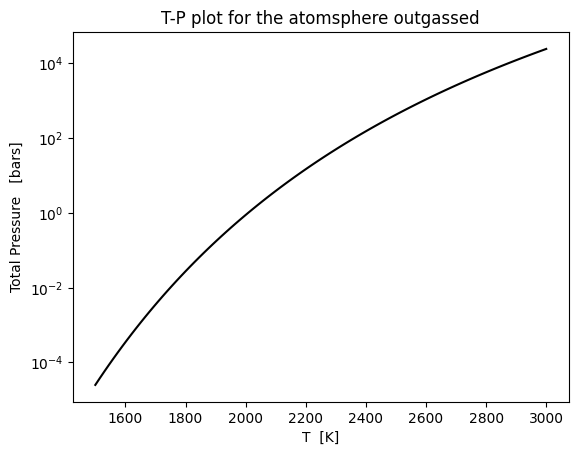

In [79]:
plt.figure()
plt.semilogy(T, Ptotal, 'k-')
plt.xlabel('T  [K]')
plt.ylabel('Total Pressure   [bars]')
plt.title('T-P plot for the atomsphere outgassed')

In [70]:
plt.rc('axes', prop_cycle=(cycler(linestyle=['-', '--', ':', '-.'])*
                           cycler(color=['c','m','k','y','r','g','b'])))

          1500.0        1515.0        1530.0        1545.0        1560.0  \
O   1.463318e-02  1.754982e-02  2.096045e-02  2.493084e-02  2.953180e-02   
Mg  3.918693e-05  4.514112e-05  5.180729e-05  5.923905e-05  6.748861e-05   
Ca  2.437730e-11  3.120578e-11  3.972572e-11  5.029640e-11  6.333813e-11   
Al  6.577324e-12  9.285304e-12  1.301042e-11  1.809644e-11  2.498928e-11   
Si  6.711937e-05  8.004634e-05  9.508209e-05  1.124947e-04  1.325713e-04   
Na  9.340377e-01  9.306548e-01  9.268014e-01  9.224152e-01  9.174295e-01   
K   4.941323e-02  4.971070e-02  4.997340e-02  5.019740e-02  5.037842e-02   
Fe  1.809532e-03  1.959469e-03  2.117888e-03  2.284813e-03  2.460181e-03   
Ti  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Cr  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

          1575.0        1590.0        1605.0        1620.0        1635.0  ...  \
O   3.483881e-02  4.093134e-02  4.789188e-02  5.580465e-02  6.475400e-02  ...   
M

Text(0, 0.5, 'Elemental Abundance [mol fraction]')

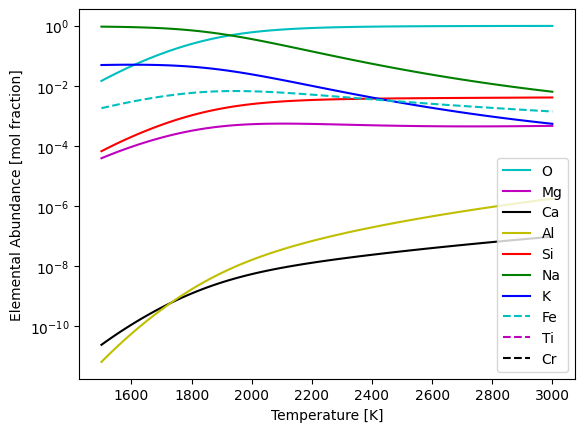

In [71]:
print(mol_elem_frac)
plt.figure()
plt.semilogy(T, mol_elem_frac.T.values)
plt.legend(mol_elem_frac.index)

plt.xlabel('Temperature [K]')
plt.ylabel('Elemental Abundance [mol fraction]')


Text(0, 0.5, 'Column Density [mol / cm$^2$]')

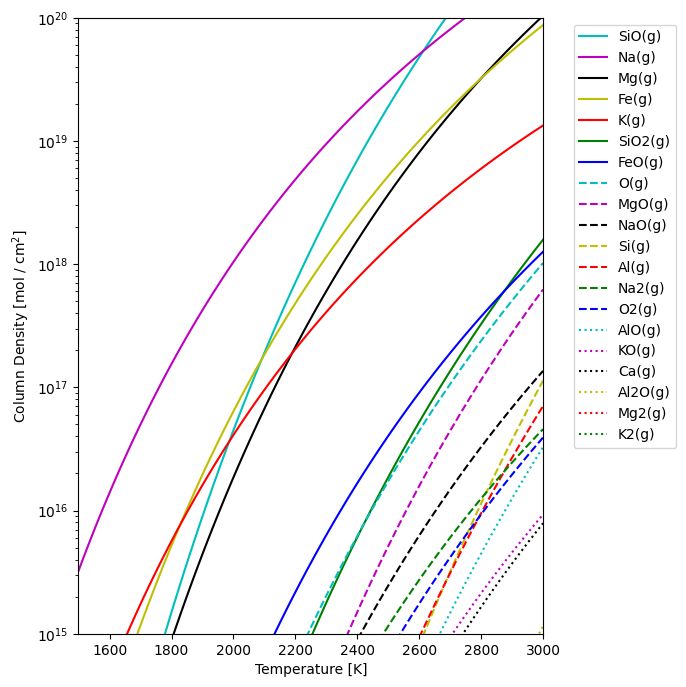

In [16]:

# linestyle_cycler = cycler('linestyle',['-','--',':','-.'])
# plt.rc('axes', prop_cycle=linestyle_cycler)

plt.figure(figsize=(6,8))
plt.semilogy(T, density_high.T.values);
plt.ylim(1e15,1e20)
plt.xlim(1499,3001)
plt.legend(list(density_high.index), bbox_to_anchor=(1.05, 1))
plt. xlabel('Temperature [K]')
plt.ylabel(r'Column Density [mol / cm$^2$]')

In [22]:
# linestyle_cycler = cycler('linestyle',['-','--',':','-.'])
# plt.rc('axes', prop_cycle=linestyle_cycler)
print(density_high)
#par_press = density_high.T.values*((10**2)**2)*8.31*T
#print(par_press)
#plt.figure(figsize=(6,8))
#plt.semilogy(T, density_high.T.values*((10**2)**2))
#plt.ylim(1e15,1e20)
#plt.xlim(1499,3001)
#plt.legend(list(density_high.index), bbox_to_anchor=(1.05, 1))
#plt. xlabel('Temperature [K]')
#plt.ylabel(r'Column Density [mol / cm$^2$]')

                    1500.0        1515.0        1530.0        1545.0  \
species_name                                                           
SiO(g)        1.578149e+12  2.375925e+12  3.547671e+12  5.255147e+12   
Na(g)         3.262095e+15  4.109797e+15  5.153466e+15  6.432712e+15   
Mg(g)         1.724493e+12  2.511423e+12  3.628587e+12  5.202560e+12   
Fe(g)         3.138080e+13  4.265492e+13  5.761110e+13  7.733170e+13   
K(g)          1.014753e+14  1.290823e+14  1.633943e+14  2.058421e+14   
SiO2(g)       2.146513e+08  3.397165e+08  5.327016e+08  8.278546e+08   
FeO(g)        1.448372e+10  2.119633e+10  3.077409e+10  4.433603e+10   
O(g)          1.185050e+09  1.786276e+09  2.670766e+09  3.961884e+09   
MgO(g)        6.209197e+06  1.048326e+07  1.750945e+07  2.894017e+07   
NaO(g)        1.400063e+08  2.132372e+08  3.220124e+08  4.822651e+08   
Si(g)         1.118041e+03  2.122147e+03  3.977435e+03  7.363780e+03   
Al(g)         2.263846e+04  4.044262e+04  7.141150e+04  1.246759

Chaning the fo2

In the above example fo2 was represnted by the pm 1.5 value, i want to explore a range of fo2 values so will start by doubling it

In [ ]:
help(system.calc_gas_props)

In [45]:
T1 = np.linspace(1500,3000,101)
P1 = 1e-10 #In bars, intital surface pressure
buffer = 'IW' # Iron-Wusite buffer
dlogfO2 = [-4,-3,-2,-1,0]
g=36.2
Ptotal1=np.zeros((len(T1),len(dlogfO2)))
density1=np.zeros((len(T1),len(dlogfO2),34))
density_high1=np.zeros((len(T1),len(dlogfO2),20))
print(Ptotal1.shape,density1.shape)
mol_elem_frac1=np.zeros((len(T1),len(dlogfO2),10))
print(mol_elem_frac1.shape)
#Ptotal1[5,5]
AS =[]
for j in range(len(dlogfO2)):
        logfO21 = vaporock.redox_buffer(T1, buffer=buffer, dlogfO2=dlogfO2[j]) #Oxygen fugacity for given temperature range and Pressure
        #print(i,logfO2)
        logP1, lnk1, lna1 =  system.eval_gas_abundances(T1, logfO21, full_output=True, method='activity')
        CD=np.array(system.calc_column_density(logP1, logfO21, g))
        #print(CD.shape)
        CDT=np.transpose(CD)
        density1[:,j,:] = CDT
        AS = (system.get_abundant_species(system.calc_column_density(logP1, logfO21, g), N=20))
        AST = np.transpose(AS)
        density_high1[:,j,:] = AST
        MEF ,PTOTAL = (system.calc_gas_props(T1, logP1))
        print(MEF)
        MEFA=np.array(MEF)
        MEFT = np.transpose(MEFA)
        print(MEFA.shape)
        mol_elem_frac1[:,j,:]=MEFT
            #print(mol_elem_frac1)
        Ptotal1[:,j]= np.array(np.sum(10**logP1, axis=0))
        #density1.shape

#print(MEFA.shape)
#print(density1)       

(101, 5) (101, 5, 34)
(101, 5, 10)


/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

          1500.0        1515.0        1530.0        1545.0        1560.0  \
O   3.370622e-03  3.992745e-03  4.710551e-03  5.535322e-03  6.479111e-03   
Mg  2.028866e-03  2.324868e-03  2.654085e-03  3.018790e-03  3.421217e-03   
Ca  1.244453e-09  1.581791e-09  1.999024e-09  2.512128e-09  3.139592e-09   
Al  1.307245e-10  1.837533e-10  2.563682e-10  3.550760e-10  4.882911e-10   
Si  3.367747e-03  3.989431e-03  4.706744e-03  5.530966e-03  6.474144e-03   
Na  8.608590e-01  8.533797e-01  8.455130e-01  8.372472e-01  8.285712e-01   
K   4.554190e-02  4.558310e-02  4.559034e-02  4.556263e-02  4.549902e-02   
Fe  8.483184e-02  9.073014e-02  9.682526e-02  1.031050e-01  1.095553e-01   
Ti  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Cr  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

          1575.0        1590.0        1605.0        1620.0        1635.0  ...  \
O   7.554704e-03  8.775564e-03  1.015575e-02  1.170985e-02  1.345280e-02  ...   
M

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

          1500.0        1515.0        1530.0        1545.0        1560.0  \
O   1.980095e-03  2.353439e-03  2.786430e-03  3.286684e-03  3.862476e-03   
Mg  1.189641e-03  1.367846e-03  1.567180e-03  1.789349e-03  2.036088e-03   
Ca  7.297018e-10  9.306633e-10  1.180396e-09  1.489052e-09  1.868512e-09   
Al  4.737119e-11  6.680509e-11  9.352803e-11  1.300143e-10  1.794871e-10   
Si  1.974747e-03  2.347252e-03  2.779298e-03  3.278490e-03  3.853094e-03   
Na  8.976233e-01  8.928543e-01  8.878177e-01  8.825006e-01  8.768895e-01   
K   4.748685e-02  4.769165e-02  4.787144e-02  4.802533e-02  4.815234e-02   
Fe  4.974535e-02  5.338556e-02  5.717796e-02  6.111958e-02  6.520647e-02   
Ti  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Cr  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

          1575.0        1590.0        1605.0        1620.0        1635.0  ...  \
O   4.522759e-03  5.277160e-03  6.135976e-03  7.110155e-03  8.211262e-03  ...   
M

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/Documents/vaporock/src/vaporock/equil.py:241: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  density = P_species*Navogadro/(g*species_mass[:, np.newaxis])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  ret

          1500.0        1515.0        1530.0        1545.0        1560.0  \
O   1.147717e-03  1.366706e-03  1.621456e-03  1.916745e-03  2.257820e-03   
Mg  6.854433e-04  7.897357e-04  9.068002e-04  1.037762e-03  1.183789e-03   
Ca  4.204501e-10  5.373440e-10  6.830260e-10  8.636378e-10  1.086414e-09   
Al  1.972609e-11  2.786846e-11  3.909091e-11  5.445188e-11  7.533622e-11   
Si  1.137882e-03  1.355301e-03  1.608276e-03  1.901564e-03  2.240389e-03   
Na  9.197053e-01  9.166932e-01  9.135136e-01  9.101564e-01  9.066109e-01   
K   4.865506e-02  4.896501e-02  4.925699e-02  4.953036e-02  4.978444e-02   
Fe  2.866859e-02  3.083004e-02  3.309289e-02  3.545722e-02  3.792266e-02   
Ti  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Cr  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

          1575.0        1590.0        1605.0        1620.0        1635.0  ...  \
O   2.650422e-03  3.100803e-03  3.615744e-03  4.202567e-03  4.869138e-03  ...   
M

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

          1500.0        1515.0        1530.0        1545.0        1560.0  \
O   6.672904e-04  7.951949e-04  9.442056e-04  1.117210e-03  1.317397e-03   
Mg  3.908587e-04  4.508686e-04  5.183653e-04  5.940414e-04  6.786237e-04   
Ca  2.397755e-10  3.068091e-10  3.904948e-10  4.944370e-10  6.228985e-10   
Al  1.076539e-11  1.522179e-11  2.137089e-11  2.979795e-11  4.127044e-11   
Si  6.489931e-04  7.739326e-04  9.195785e-04  1.088775e-03  1.284669e-03   
Na  9.325965e-01  9.306545e-01  9.286137e-01  9.264674e-01  9.242082e-01   
K   4.933705e-02  4.971076e-02  5.007120e-02  5.041801e-02  5.075077e-02   
Fe  1.635930e-02  1.761473e-02  1.893291e-02  2.031459e-02  2.176030e-02   
Ti  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Cr  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

          1575.0        1590.0        1605.0        1620.0        1635.0  ...  \
O   1.548281e-03  1.813714e-03  2.117909e-03  2.465453e-03  2.861325e-03  ...   
M

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

          1500.0        1515.0        1530.0        1545.0        1560.0  \
O   4.054729e-04  4.829054e-04  5.731128e-04  6.778556e-04  7.990849e-04   
Mg  2.215420e-04  2.557319e-04  2.942327e-04  3.374540e-04  3.858283e-04   
Ca  1.359485e-10  1.740821e-10  2.217380e-10  2.809957e-10  3.543200e-10   
Al  7.907245e-12  1.118505e-11  1.571043e-11  2.191610e-11  3.037017e-11   
Si  3.681084e-04  4.392904e-04  5.223624e-04  6.189835e-04  7.309942e-04   
Na  9.399835e-01  9.386680e-01  9.372963e-01  9.358641e-01  9.343667e-01   
K   4.972784e-02  5.013880e-02  5.053937e-02  5.092938e-02  5.130860e-02   
Fe  9.293525e-03  1.001531e-02  1.077467e-02  1.157228e-02  1.240876e-02   
Ti  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Cr  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

          1575.0        1590.0        1605.0        1620.0        1635.0  ...  \
O   9.389554e-04  1.099839e-03  1.284341e-03  1.495308e-03  1.735849e-03  ...   
M

/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mcginty/anaconda3/envs/python10/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the 

In [30]:

density1.shape
#density1[:,:,0]


(101, 12, 34)

In [31]:
print(len(T1))
Ptotal1[:,0]

101


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [32]:
mol_elem_frac1[:,0,:]

array([[3.37062173e-03, 2.02886589e-03, 1.24445340e-09, ...,
        8.48318366e-02, 0.00000000e+00, 0.00000000e+00],
       [3.99274502e-03, 2.32486792e-03, 1.58179070e-09, ...,
        9.07301371e-02, 0.00000000e+00, 0.00000000e+00],
       [4.71055063e-03, 2.65408492e-03, 1.99902413e-09, ...,
        9.68252610e-02, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.51353014e-01, 2.65394335e-02, 3.14415812e-06, ...,
        5.25133997e-02, 0.00000000e+00, 0.00000000e+00],
       [4.52588172e-01, 2.61512532e-02, 3.18572477e-06, ...,
        5.11208280e-02, 0.00000000e+00, 0.00000000e+00],
       [4.53778793e-01, 2.57682072e-02, 3.22693804e-06, ...,
        4.97732128e-02, 0.00000000e+00, 0.00000000e+00]])

101


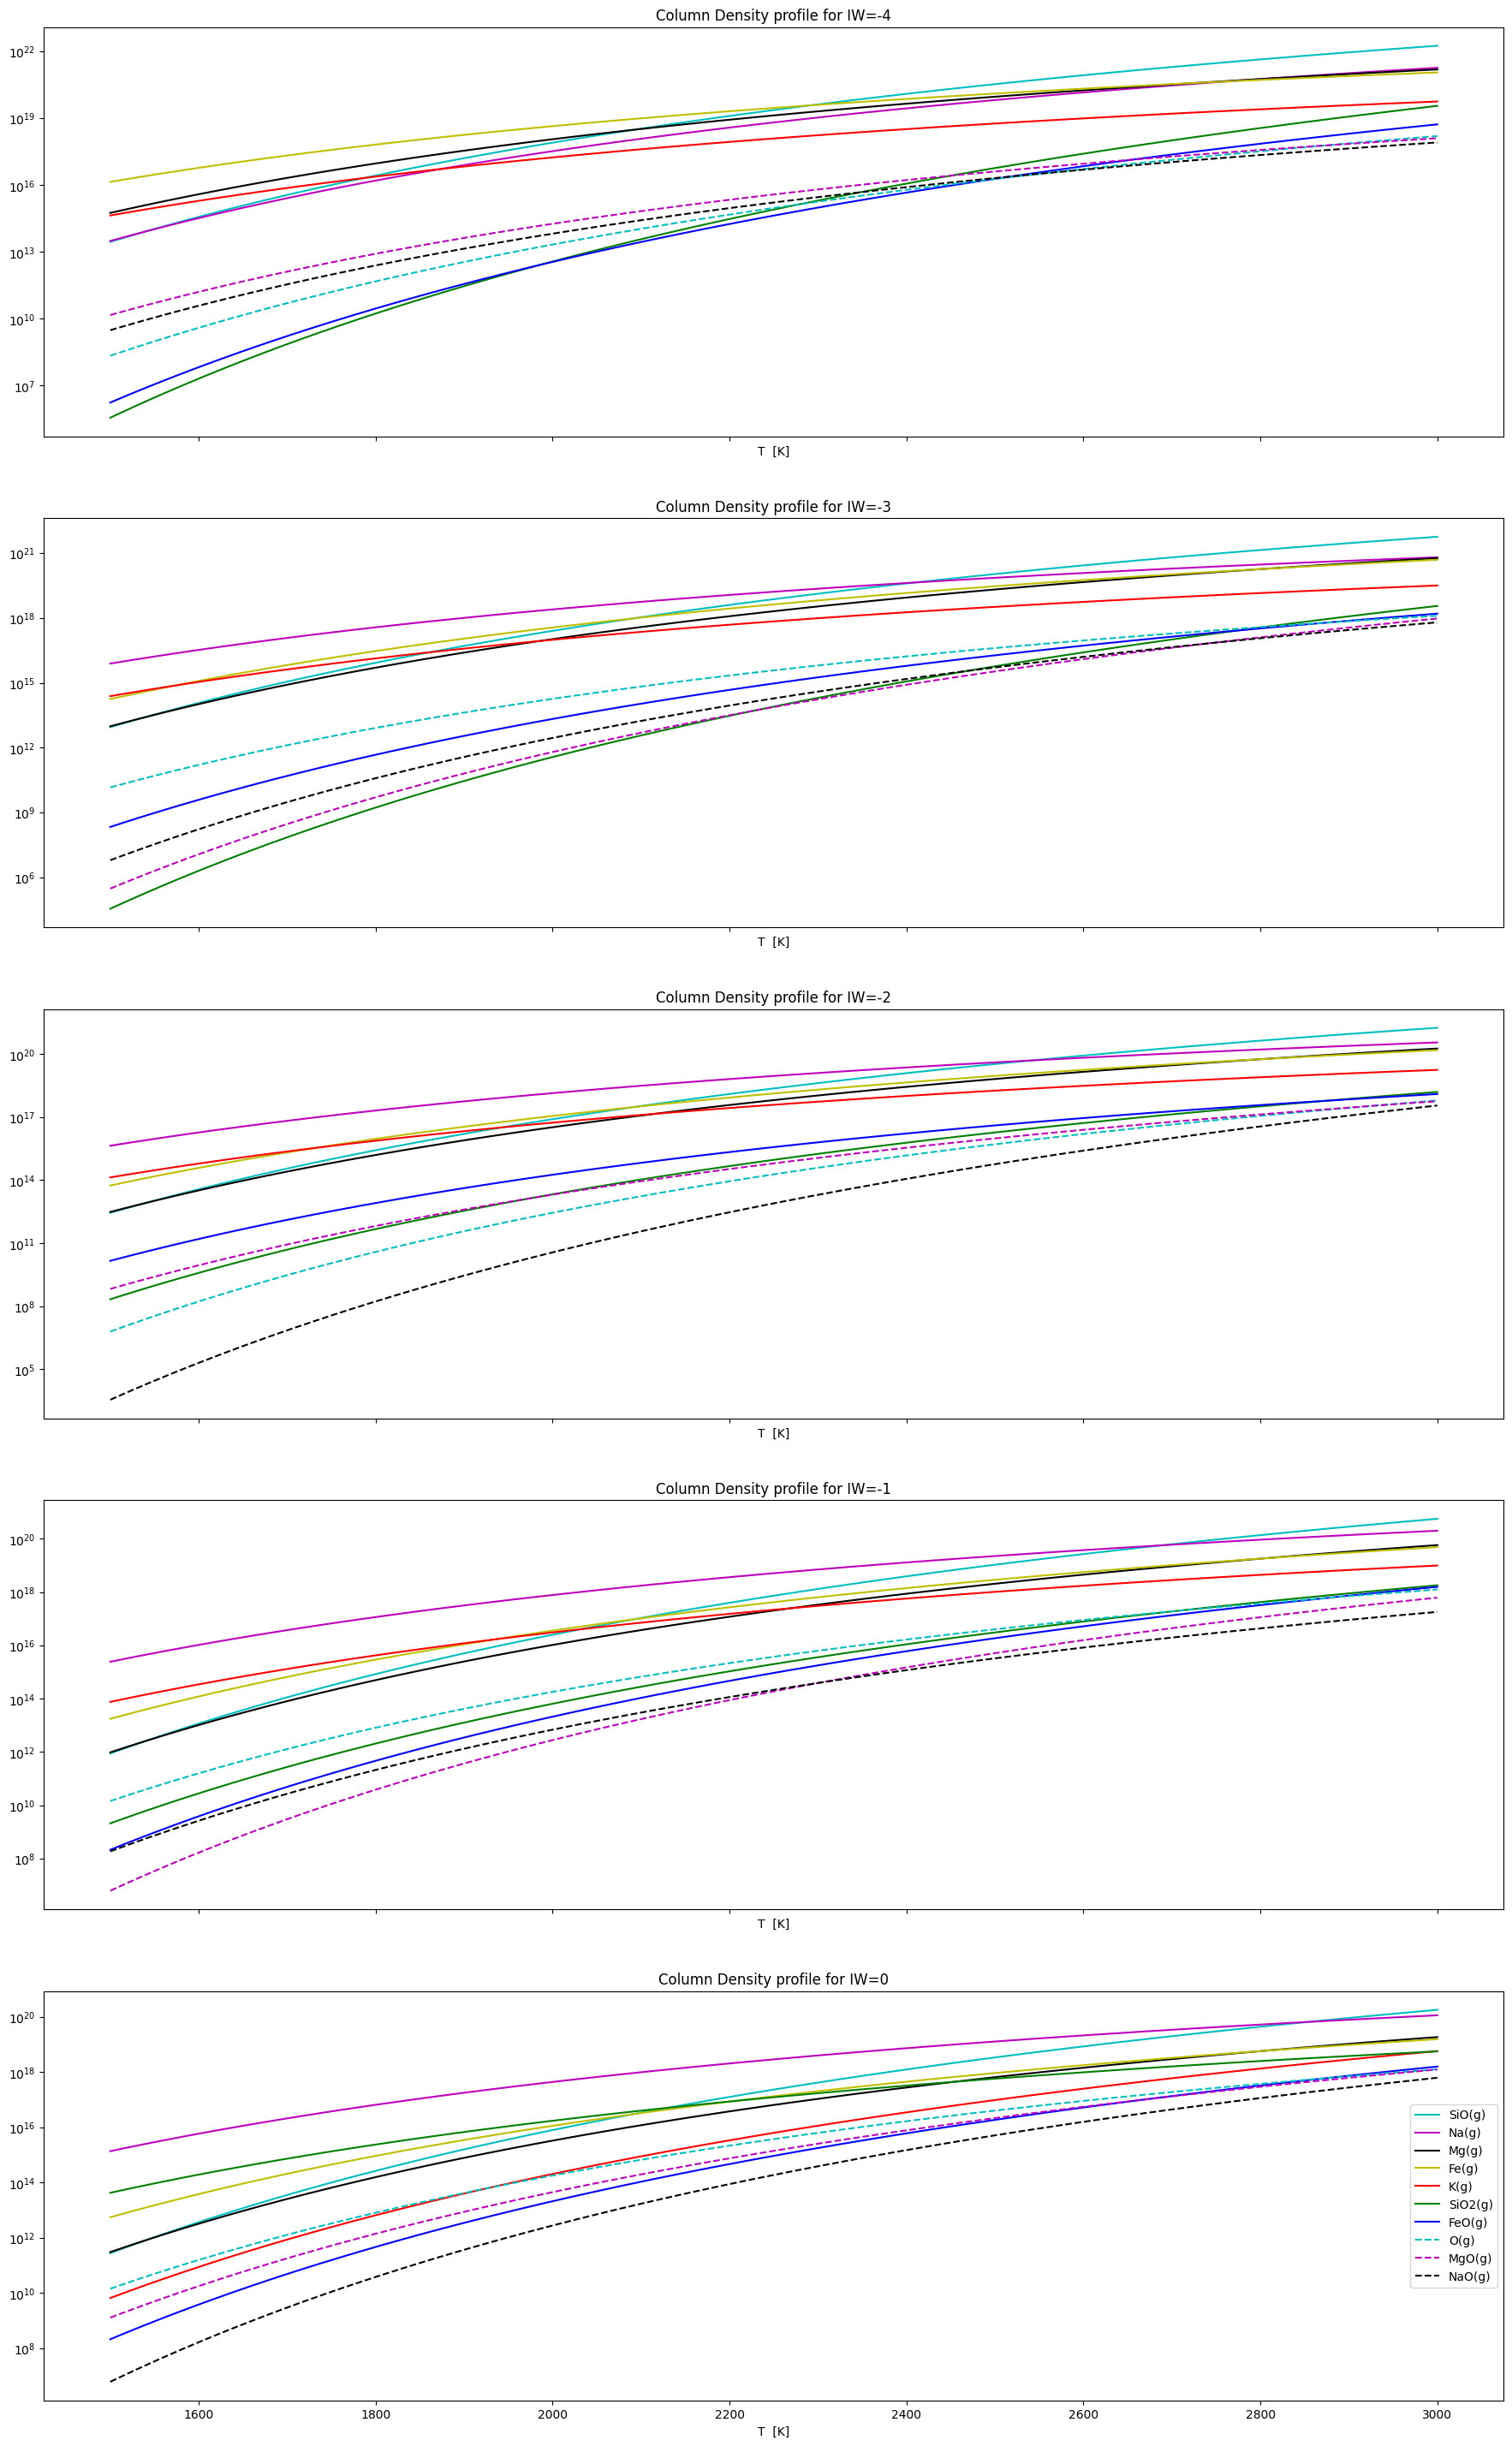

In [51]:

fig , axes = plt.subplots(nrows=5,ncols=1,figsize=(22,36),sharex=True)
axes = axes.flatten()
#cmap=plt.cm,get_cmap('jet',len(dlogfO2))
elements=['O(g)', 'O2(g)', 'Mg(g)', 'MgO(g)', 'Mg2(g)', 'Ca(g) ', 'CaO(g)', 'Ca2(g)', 'Al(g) ', 'AlO(g)', 'AlO2(g)', 'Al2(g)', 'Al2O(g)', 'Al2O2(g)', 'Si(g) ', 'SiO(g)', 'SiO2(g', 'Si2(g)', 'Si3(g)', 'Na(g) ', 'NaO(g)', 'Na2(g)', 'K(g)  ', 'KO(g) ', 'K2(g) ', 'Fe(g) ', 'FeO(g)', 'TiO(g)', 'Ti(g) ', 'TiO2(g)', 'Cr(g) ', 'CrO(g)', 'CrO2(g)', 'CrO3(g)']
#cbar = plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(0,1),cmap=plt.cm.get_cmap('jet')))
print(len(T1))
for j in range(len(dlogfO2)):
    for i in range(10):
            ax =axes[j]
            ax.semilogy(T1, density_high1[:,j,i],label=elements[i])
            ax.set_xlabel('T  [K]')
            ax.set_title( "Column Density profile for IW=" +str(dlogfO2[j]))
            #plt.colorbar(label='fO2 values')
            #print(dlogfO2[j])
#ax.legend(mol_elem_frac.index,loc='center right')
ax.legend(density_high.index,loc='center right')
#ax.legend(loc='center right')
plt.savefig('column density profiles, low IW.png')

101


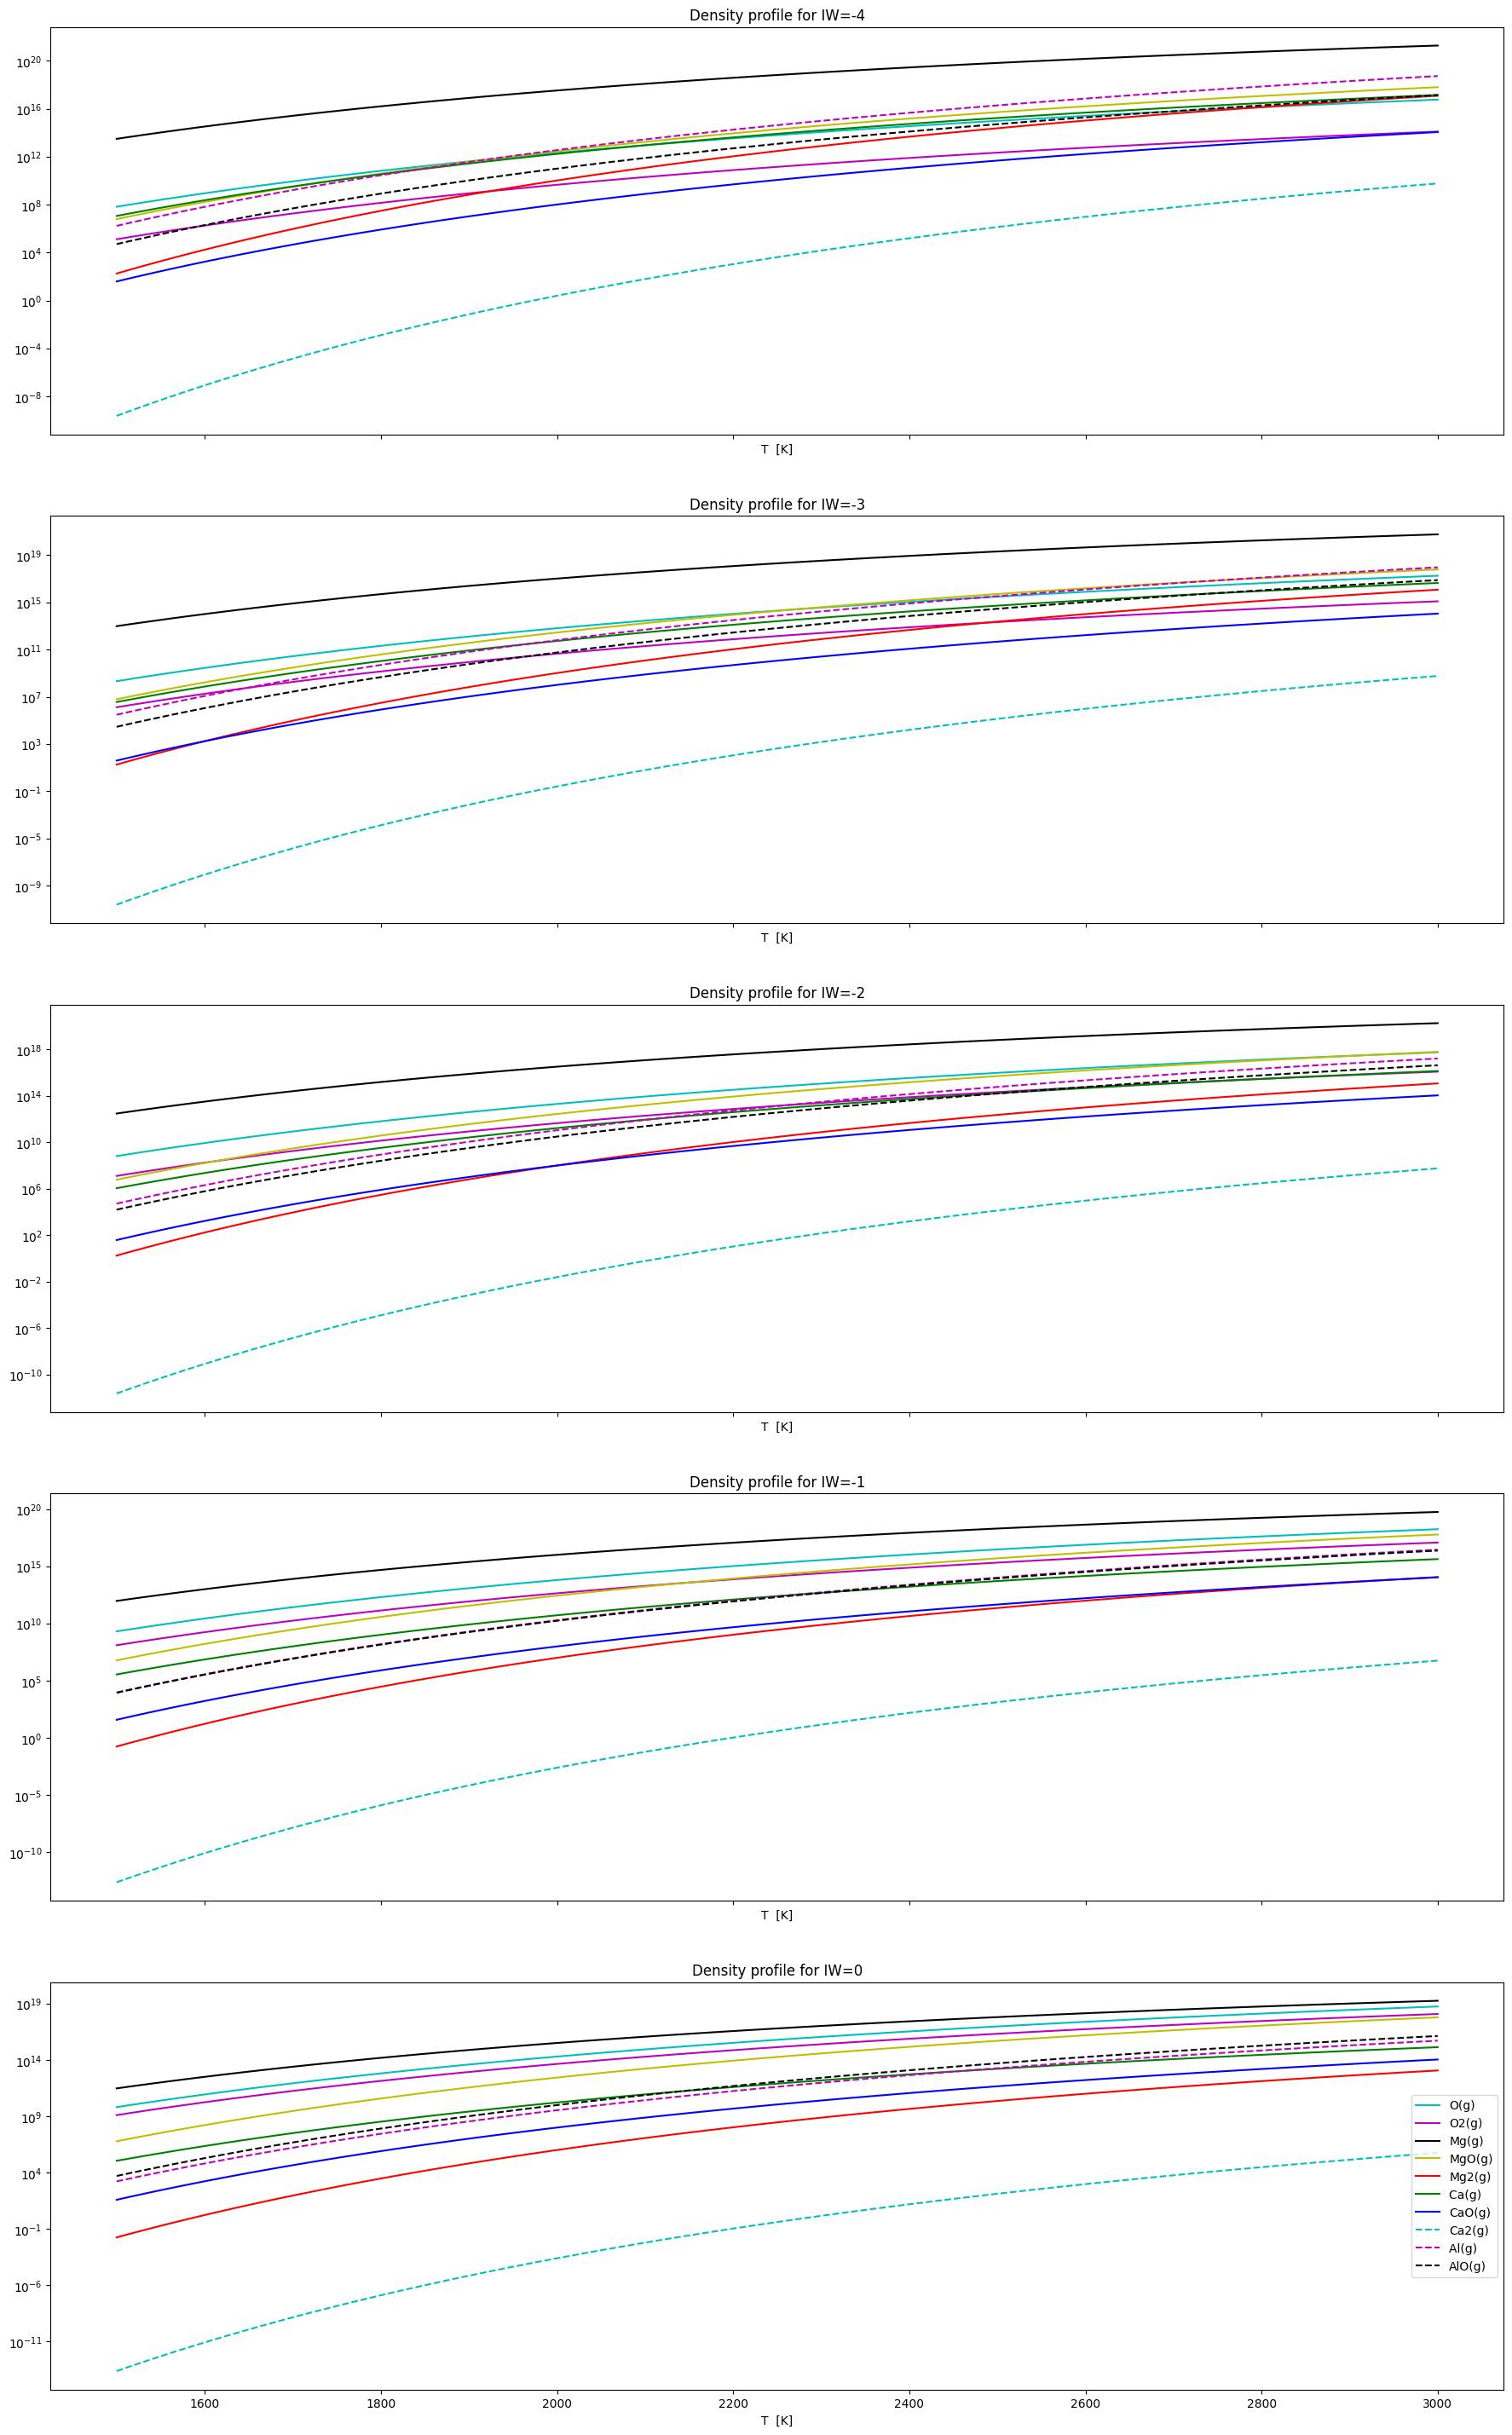

In [52]:

fig , axes = plt.subplots(nrows=5,ncols=1,figsize=(22,36),sharex=True)
axes = axes.flatten()
#cmap=plt.cm,get_cmap('jet',len(dlogfO2))
elements=['O(g)', 'O2(g)', 'Mg(g)', 'MgO(g)', 'Mg2(g)', 'Ca(g) ', 'CaO(g)', 'Ca2(g)', 'Al(g) ', 'AlO(g)', 'AlO2(g)', 'Al2(g)', 'Al2O(g)', 'Al2O2(g)', 'Si(g) ', 'SiO(g)', 'SiO2(g', 'Si2(g)', 'Si3(g)', 'Na(g) ', 'NaO(g)', 'Na2(g)', 'K(g)  ', 'KO(g) ', 'K2(g) ', 'Fe(g) ', 'FeO(g)', 'TiO(g)', 'Ti(g) ', 'TiO2(g)', 'Cr(g) ', 'CrO(g)', 'CrO2(g)', 'CrO3(g)']
#cbar = plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(0,1),cmap=plt.cm.get_cmap('jet')))
print(len(T1))
for j in range(len(dlogfO2)):
    for i in range(10):
            ax =axes[j]
            ax.semilogy(T1, density1[:,j,i],label=elements[i])
            ax.set_xlabel('T  [K]')
            ax.set_title( "Density profile for IW=" +str(dlogfO2[j]))
            #plt.colorbar(label='fO2 values')
            #print(dlogfO2[j])
#ax.legend(mol_elem_frac.index,loc='center right')
ax.legend(loc='center right')
plt.savefig('density profiles,low IW.png')

101


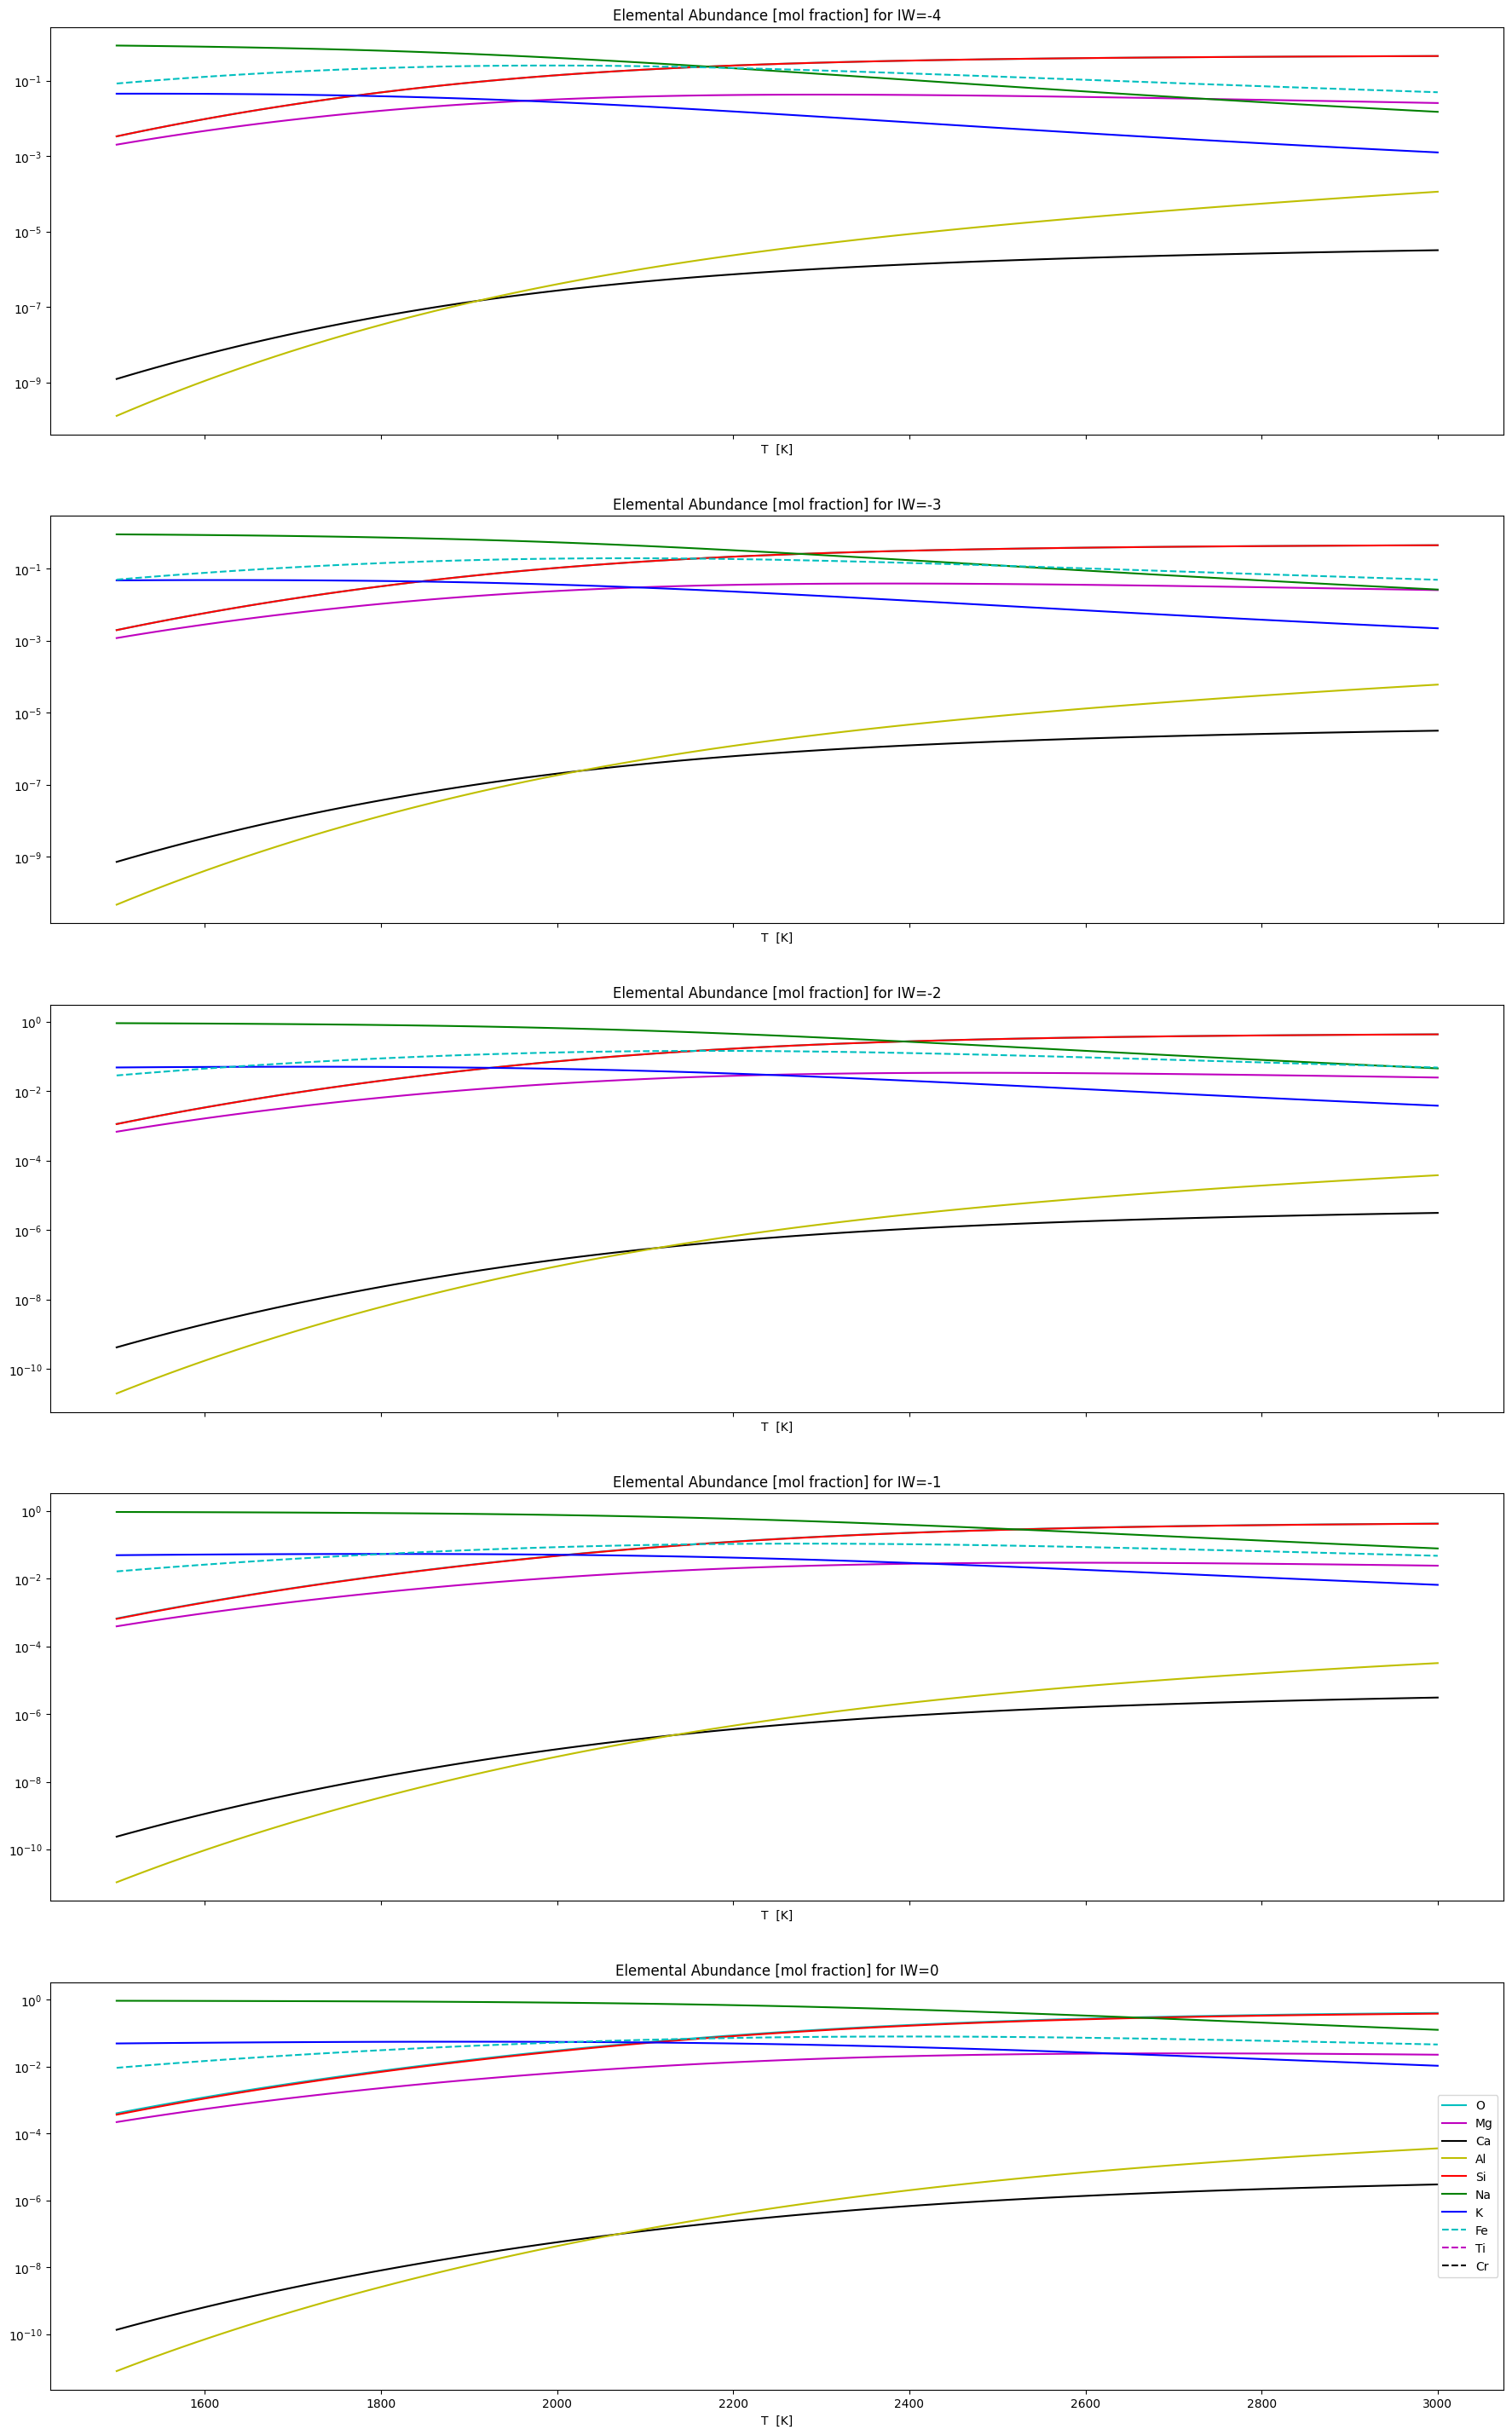

In [53]:
fig , axes = plt.subplots(nrows=5,ncols=1,figsize=(22,36),sharex=True)
axes = axes.flatten()
#cmap=plt.cm,get_cmap('jet',len(dlogfO2))
elements=['O(g)', 'O2(g)', 'Mg(g)', 'MgO(g)', 'Mg2(g)', 'Ca(g) ', 'CaO(g)', 'Ca2(g)', 'Al(g) ', 'AlO(g)', 'AlO2(g)', 'Al2(g)', 'Al2O(g)', 'Al2O2(g)', 'Si(g) ', 'SiO(g)', 'SiO2(g', 'Si2(g)', 'Si3(g)', 'Na(g) ', 'NaO(g)', 'Na2(g)', 'K(g)  ', 'KO(g) ', 'K2(g) ', 'Fe(g) ', 'FeO(g)', 'TiO(g)', 'Ti(g) ', 'TiO2(g)', 'Cr(g) ', 'CrO(g)', 'CrO2(g)', 'CrO3(g)']
#cbar = plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(0,1),cmap=plt.cm.get_cmap('jet')))
print(len(T1))
for j in range(len(dlogfO2)):
    for i in range(10):
            ax =axes[j]
            ax.semilogy(T1, mol_elem_frac1[:,j,i],label=elements[i])
            ax.set_xlabel('T  [K]')
            ax.set_title( "Elemental Abundance [mol fraction] for IW=" +str(dlogfO2[j]))
            #plt.colorbar(label='fO2 values')
            #print(dlogfO2[j])
ax.legend(mol_elem_frac.index,loc='center right')
#ax.legend(loc='center right')
plt.savefig('element abudances profiles, low IW.png')

In [ ]:

fig , axes = plt.subplots(nrows=6,ncols=2,figsize=(22,16),sharex=True)
axes = axes.flatten()
#cmap=plt.cm,get_cmap('jet',len(dlogfO2))
elements=['O(g)', 'O2(g)', 'Mg(g)', 'MgO(g)', 'Mg2(g)', 'Ca(g) ', 'CaO(g)', 'Ca2(g)', 'Al(g) ', 'AlO(g)', 'AlO2(g)', 'Al2(g)', 'Al2O(g)', 'Al2O2(g)', 'Si(g) ', 'SiO(g)', 'SiO2(g', 'Si2(g)', 'Si3(g)', 'Na(g) ', 'NaO(g)', 'Na2(g)', 'K(g)  ', 'KO(g) ', 'K2(g) ', 'Fe(g) ', 'FeO(g)', 'TiO(g)', 'Ti(g) ', 'TiO2(g)', 'Cr(g) ', 'CrO(g)', 'CrO2(g)', 'CrO3(g)']
#cbar = plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(0,1),cmap=plt.cm.get_cmap('jet')))
print(len(T1))
for j in range(-4,12,2):
    for i in range(10):
            #print(j)
            ax =axes[j]
            ax.semilogy(T1, density1[:,j,i],label=elements[i])
            ax.set_xlabel('T  [K]')
            ax.set_title( "Density profile for IW=" +str(dlogfO2[j]))
            #plt.colorbar(label='fO2 values')
            #print(dlogfO2[j])
ax.legend()
plt.savefig('density profiles for selected IW.png')

(101, 5)


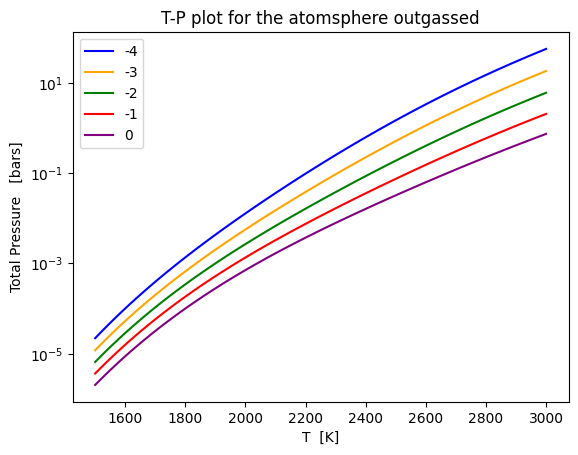

In [50]:
plt.figure()
#cmap=plt.cm,get_cmap('jet',len(dlogfO2))
colors=['blue','orange','green','red','purple','brown','pink','gray','olive','cyan','lime','black']
for i in range(len(dlogfO2)):
    #cbar = plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(0,1),cmap=plt.cm.get_cmap('jet')))
    plt.semilogy(T1, Ptotal1[:,i], color=colors[i],linestyle='-',label=dlogfO2[i])
    plt.xlabel('T  [K]')
    plt.ylabel('Total Pressure   [bars]')
    plt.title('T-P plot for the atomsphere outgassed')
    plt.legend()
#plt.colorbar(label='fO2 values')
print(Ptotal1.shape)